# Import Packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import openpyxl
import matplotlib.pyplot as plt
import re
import urllib.request
import pdfkit

In [2]:
pip freeze > requirements.txt  # Python3

Note: you may need to restart the kernel to use updated packages.


# Initialization

In [3]:
# Define the URL of the website
url = "https://www.phei.co.id/Data/HPW-dan-Imbal-Hasil"

response = requests.get(url)
html_response = response.content
text_find = response.text
df_list = pd.read_html(html_response)

In [4]:
start_ = re.search('<div id="dnn_ctr1477_GovernmentBondBenchmark_idIGSYC_tdTgl">', text_find).start()
date_yc = text_find[start_ :100+start_]
date_yc = date_yc.split(' ')[-2]
split = date_yc.find('<')
clean_date = date_yc[:split]
clean_date

'27-Maret-2025'

In [5]:
if int(clean_date.split('-')[0]) < 10:
    cleaner_date = clean_date.split('-')
    cleaner_date[0] = '0' + cleaner_date[0]
    clean_date = '-'.join(cleaner_date)
clean_date

'27-Maret-2025'

In [6]:
dict_month_number = {"Januari": "01", 
                     "Februari": "02", 
                     "Maret": "03", 
                     "April": "04", 
                     "Mei": "05", 
                     "Juni": "06", 
                     "Juli": "07", 
                     "Agustus": "08", 
                     "September": "09", 
                     "Oktober": "10", 
                     "November": "11", 
                     "Desember": "12",}

In [7]:
sub_path = f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}'
try:
    os.makedirs(sub_path)
    print(f"Folder {sub_path} created!")
except FileExistsError:
    print(f"Folder {sub_path} already exists")

sub_path_image = sub_path+'/image'
try:
    os.makedirs(sub_path_image)
    print(f"Folder {sub_path_image} created!")
except FileExistsError:
    print(f"Folder {sub_path_image} already exists")

sub_path_py_image = sub_path+'/py-image'
try:
    os.makedirs(sub_path_py_image)
    print(f"Folder {sub_path_py_image} created!")
except FileExistsError:
    print(f"Folder {sub_path_py_image} already exists")
    
sub_path_pdf_image = sub_path+'/pdf'
try:
    os.makedirs(sub_path_pdf_image)
    print(f"Folder {sub_path_pdf_image} created!")
except FileExistsError:
    print(f"Folder {sub_path_pdf_image} already exists")

Folder 2025-03-Maret already exists
Folder 2025-03-Maret/image already exists
Folder 2025-03-Maret/py-image already exists
Folder 2025-03-Maret/pdf already exists


# Saving URL as PDF

In [8]:
pdf_path = f'{sub_path_pdf_image}/{clean_date}.pdf'
urllib.request.urlretrieve(url, pdf_path)

('2025-03-Maret/pdf/27-Maret-2025.pdf',
 <http.client.HTTPMessage at 0x28e9087af80>)

# Saving Image as PDF

In [9]:
# Save image from Website
img_location_url = text_find[re.search('ChartPic', text_find).start():re.search('ChartPic', text_find).start()+200].split(' ')[0][:-1]
imgURL = "https://www.phei.co.id/"+img_location_url
urllib.request.urlretrieve(imgURL,f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}/image/{clean_date}.jpeg')


('2025-03-Maret/image/27-Maret-2025.jpeg',
 <http.client.HTTPMessage at 0x28e9087b070>)

In [10]:
def prepare_data(df, type_df):
    copy_df = df.copy()
    copy_df.drop(columns = copy_df.columns[[0, -1]], inplace = True)
    copy_df['type'] = type_df
    return copy_df

# Saving Underlying Bond Data

In [11]:
sbn_data = prepare_data(df_list[2], 'sbn')
sbsn_data = prepare_data(df_list[3], 'sbsn')
retail_data= prepare_data(df_list[4], 'retail')

bond_data = pd.concat((sbn_data, 
                             sbsn_data,
                             retail_data), axis = 0).reset_index(drop = True)

In [12]:
bond_data.iloc[:,1] /= 100
bond_data.iloc[:,2:-1] /= 10000
bond_data

,Series,TTM (Y),Today Yield (%),Today Price (%),Yesterday Yield (%),Yesterday Price (%),Coupon(%),type
0,FR0104,5.30,6.7453,98.9087,6.8401,98.4946,6.500,sbn
1,FR0103,10.31,7.0037,98.1456,7.1392,97.1800,6.750,sbn
2,FR0106,15.40,7.0141,101.0238,7.1772,99.5080,7.125,sbn
3,FR0107,20.40,7.0985,100.2722,7.1900,99.2990,7.125,sbn
4,PBS003,1.81,6.7309,98.7659,6.7779,98.6860,6.000,sbsn
5,PBS030,3.30,6.6608,97.6921,6.7178,97.5264,5.875,sbsn
6,PBS034,14.23,6.8394,96.9314,6.8853,96.5271,6.500,sbsn
7,PBS038,24.74,7.1337,96.9996,7.1848,96.4266,6.875,sbsn
8,ORI022,0.55,6.4738,99.7169,6.5035,99.6994,5.950,retail
9,ORI023T3,1.30,6.6130,99.1131,6.6524,99.0625,5.900,retail


In [13]:
bond_data.to_excel(f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}/Bond-Data-{clean_date}.xlsx', 
            sheet_name=clean_date)

# Calculating Spot Rate and Saving Spot Rate Data

In [14]:
df = pd.concat((df_list[0],df_list[1]), axis = 0)[['Tenor Year', 'Today']]
df['Tenor Year'] /= 10
df['Today'] /= 1e6
df.rename(columns = {'Today': 'IBPA Yield'}, inplace = True)
df.set_index('Tenor Year', inplace=True)

In [15]:
def spot_rate(df):
    spot_data = df.values.copy()
    for j in range(2,df.shape[0]):
        minus = 0
        for k in range(1,j):
            minus -= spot_data[j]/(1+spot_data[k])**k
        spot_data[j] = ((1+df.iloc[j])/(1+minus))**(1/j)-1
    return spot_data

In [16]:
df['Spot-Rate'] = spot_rate(df)

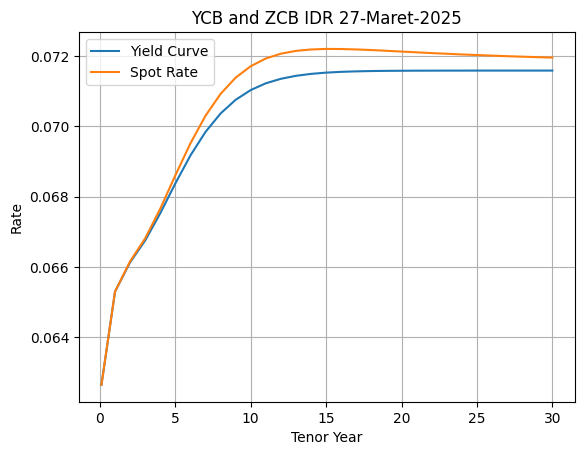

In [17]:
plt.plot(df.index, df['IBPA Yield'], label = 'Yield Curve')
plt.plot(df.index, df['Spot-Rate'], label = 'Spot Rate')
plt.xlabel('Tenor Year')
plt.ylabel('Rate')
plt.legend()
plt.title(f'YCB and ZCB IDR {clean_date}')
plt.grid()
plt.savefig(f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}/py-image/{clean_date}.jpeg')
plt.show()

In [18]:
df.to_excel(f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}/Yield-Curve-{clean_date}.xlsx', 
            sheet_name=clean_date)

# Saving Corporate Bond Data

In [19]:
corporate_bond = df_list[5].iloc[:,1:-1]
corporate_bond.iloc[:,0] /= 10
corporate_bond.iloc[:,1:] /= 1e6
corporate_bond


,Tenor(Year),IGS,AAA,AA,A,BBB
0,0.1,0.062647,0.065382,0.067510,0.074466,0.085495
1,1.0,0.065302,0.068162,0.071400,0.086327,0.097969
2,2.0,0.066136,0.069032,0.073235,0.090167,0.103644
3,3.0,0.066757,0.069777,0.074628,0.092574,0.107331
4,4.0,0.067532,0.070806,0.076081,0.094853,0.110564
5,5.0,0.068380,0.071984,0.077548,0.096838,0.113415
6,6.0,0.069175,0.073126,0.078901,0.098363,0.115758
7,7.0,0.069846,0.074116,0.080053,0.099428,0.117554
8,8.0,0.070371,0.074911,0.080978,0.100121,0.118858
9,9.0,0.070760,0.075517,0.081687,0.100551,0.119762


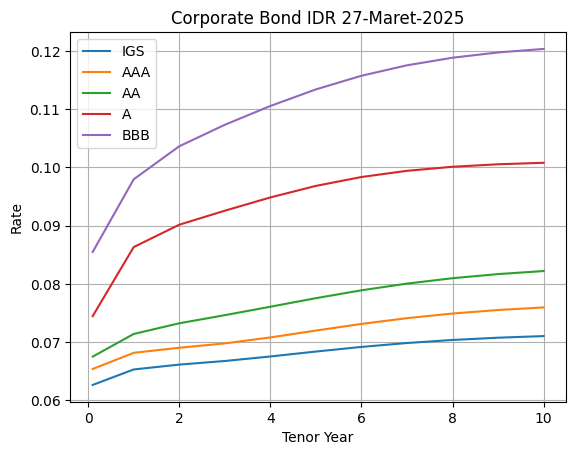

In [20]:
plt.plot(corporate_bond.iloc[:,0], corporate_bond.iloc[:,1:], label = corporate_bond.columns[1:])
plt.legend()
plt.xlabel('Tenor Year')
plt.ylabel('Rate')
plt.title(f'Corporate Bond IDR {clean_date}')
plt.grid()
plt.savefig(f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}/py-image/Corporate Bond IDR-{clean_date}.jpeg')
plt.show()

In [21]:
corporate_bond.to_excel(f'{clean_date.split("-")[2]}-{dict_month_number.get(clean_date.split("-")[1])}-{clean_date.split("-")[1]}/Corporate-Bond-{clean_date}.xlsx', 
            sheet_name=clean_date)